In [1]:
from __future__ import division
from neuron import h, gui
import matplotlib.pyplot as plt
plt.ion()

### Build Model, setup and run experiment, plot results

In [2]:
soma = h.Section(name="soma")
soma.L    = 10 # um
soma.diam = 10 # um
soma.Ra   = 100
soma.insert('pas')
soma.g_pas = 1/10000 # 1/Rm - Rm ohm*cm^2
# create dendrite
dend = h.Section(name="dend")
dend.L = 500  # um
dend.diam = 1    # um
dend.Ra = 100  # ohm*cm
dend.insert('pas')
dend.g_pas = 1/10000
dend.connect(soma, 1, 0)  # connect the end of the soma to the start of the dendrite

h("forall { nseg = int((L/(0.1*lambda_f(100))+0.9)/2)*2 + 1  }")  # set the number of segments

1

In [3]:
# add stimuli
stim = h.IClamp(soma(0.5))  # add a current clamp the the middle of the soma
stim.delay = 10  # ms
stim.dur = 100 # ms
stim.amp = 0.1 # nA

In [4]:
# set up recordings
soma_v = h.Vector()  # set up a recording vector
soma_v.record(soma(0.5)._ref_v)  # record voltage at the middle of the soma
# Record voltage from all segments in the dendrite
dend_vs = []
for seg in dend:
    dend_vs.append(h.Vector())
    dend_vs[-1].record(seg._ref_v)
t = h.Vector()
t.record(h._ref_t)  # record time

Vector[23]

In [5]:
# run simulation
h.v_init = -70  # set starting voltage 
h.tstop = 200  # set simulation time
h.run();  # run simulation

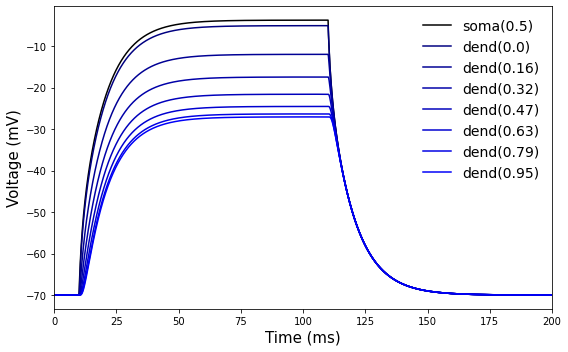

In [6]:
# plot results
plt.figure(figsize=(8, 5))
plt.plot(t, soma_v, color='k', label='soma(0.5)')
for i, v in list(enumerate(dend_vs))[::3]:
    plt.plot(t, v, color=(0,0,0.5+0.5*i/len(dend_vs)), 
        label='dend({:.2})'.format(i/len(dend_vs)))
plt.xlim(0, 200)
plt.xlabel('Time (ms)', fontsize=15)
plt.ylabel('Voltage (mV)', fontsize=15)
plt.legend(fontsize=14, frameon=False)
plt.tight_layout()

### Add active channels to the soma and rerun simulation

In [8]:
# add active channels
soma.insert('kv') # add potassium channel
soma.gbar_kv = 2000 # set the potassium conductance
soma.insert('na') # add sodium channel
soma.gbar_na = 10000 # set the sodium conductance
h.celsius = 30

In [9]:
# run simulation
h.tstop = 25
stim.dur = 5
h.run();

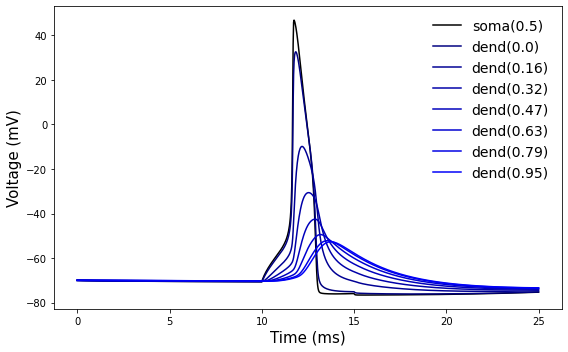

In [10]:
# plot results
plt.figure(figsize=(8,5))
plt.plot(t, soma_v, color='k', label='soma(0.5)')
for i,v in list(enumerate(dend_vs))[::3]:
    plt.plot(t, v, color=(0,0,0.5+0.5*i/len(dend_vs)), 
            label = 'dend({:.2})'.format(i/len(dend_vs)))

plt.xlabel('Time (ms)', fontsize = 15)
plt.ylabel('Voltage (mV)', fontsize = 15)
plt.legend(fontsize=14, frameon=False)
plt.tight_layout();